In [5]:
import xarray as xr
import sklearn

import numpy as np
import pandas as pd
from pathlib import Path

import os, sys
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
#import seaborn as sns
#sns.set_style('ticks')

from scipy import stats
from scipy.stats import percentileofscore
from scipy.signal import detrend


In [6]:
#load the cleaned csvs
df_h_pr=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.historical.r1i1p1f1.1950-2014.monterey_bay_no_temp.csv")
#df_h_pr.set_index('time')
df_p_pr=pd.read_csv("/global/scratch/users/jennaisrael/time_varying_data/cleaned_cirrus_LOCA2/EC-Earth3-Veg.ssp370.r1i1p1f1.2015-2044.monterey_bay_no_temp.csv")
#df_p_pr.set_index('time')

In [7]:
df_h_pr

,time,windspeed,psl,uas,vas,month
0,1950-01-01 12:00:00,2.526852,101664.690,-3.161263,-0.474330,1
1,1950-01-02 12:00:00,2.673091,101348.720,-3.361683,-0.849762,1
2,1950-01-03 12:00:00,2.286850,100895.110,-1.865085,0.320473,1
3,1950-01-04 12:00:00,1.692388,101511.720,0.716172,1.239971,1
4,1950-01-05 12:00:00,2.092749,101999.590,-0.211394,1.366353,1
...,...,...,...,...,...,...
23736,2014-12-27 12:00:00,1.817238,102128.695,-0.795211,0.350721,12
23737,2014-12-28 12:00:00,1.278394,102099.766,0.194331,0.022785,12
23738,2014-12-29 12:00:00,1.265284,102039.880,0.737005,0.132072,12
23739,2014-12-30 12:00:00,1.918014,101789.080,0.459542,0.318899,12


In [8]:
#detrend the data
#x_d_linear = detrend(x, type='linear')
df_h_pr['windspeed_d']=detrend(df_h_pr['windspeed'],type='linear')
df_h_pr['psl_d']=detrend(df_h_pr['psl'],type='linear')
df_h_pr['uas_d']=detrend(df_h_pr['uas'],type='linear')
df_h_pr['vas_d']=detrend(df_h_pr['vas'],type='linear')

df_p_pr['windspeed_d']=detrend(df_p_pr['windspeed'],type='linear')
df_p_pr['psl_d']=detrend(df_p_pr['psl'],type='linear')
df_p_pr['uas_d']=detrend(df_p_pr['uas'],type='linear')
df_p_pr['vas_d']=detrend(df_p_pr['vas'],type='linear')

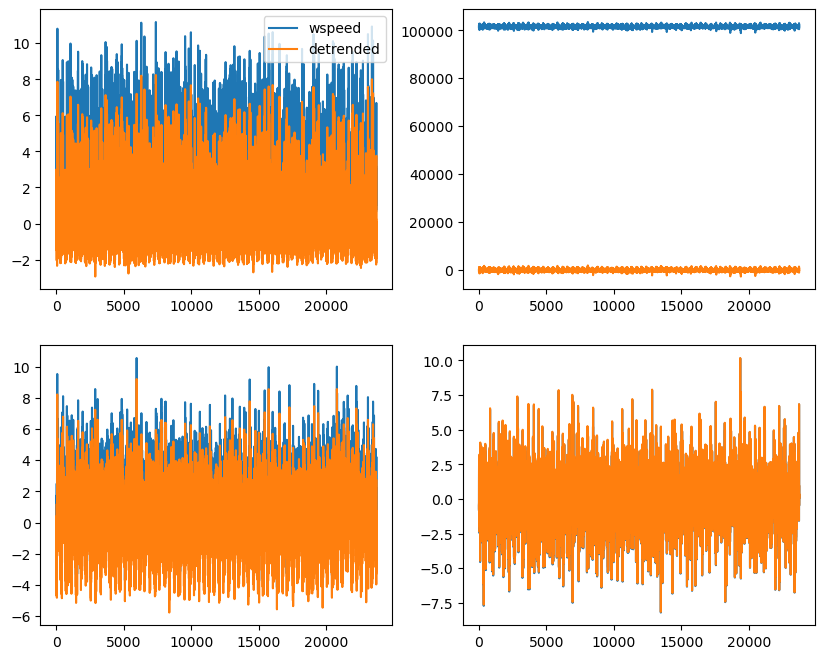

In [9]:
fig, ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].plot(df_h_pr.windspeed, label='wspeed')
ax[0,0].plot(df_h_pr.windspeed_d, label='detrended')

ax[0,1].plot(df_h_pr.psl, label='psl')
ax[0,1].plot(df_h_pr.psl_d, label='detrended')

ax[1,0].plot(df_h_pr.uas, label='uas')
ax[1,0].plot(df_h_pr.uas_d, label='detrended')

ax[1,1].plot(df_h_pr.vas, label='uas')
ax[1,1].plot(df_h_pr.vas_d, label='detrended')
ax[0,0].legend()

In [10]:
#anomalize the data (take the mean of detrended and subtract it)
#detrending with a linear model seems to have mostly taken care of this, check to make sure the means are 0
print(df_h_pr.windspeed_d.mean())
print(df_h_pr.psl_d.mean())
print(df_h_pr.uas_d.mean())
print(df_h_pr.vas_d.mean())
print(np.finfo(np.float64).eps)

-1.2366634026202493e-15
7.436855543817658e-12
1.532361234611732e-16
1.1971572145404157e-18
2.220446049250313e-16


In [11]:
print(df_p_pr.windspeed_d.mean())
print(df_p_pr.psl_d.mean())
print(df_p_pr.uas_d.mean())
print(df_p_pr.vas_d.mean())


-4.305533642495953e-16
-1.2755169352843914e-11
-3.968353296999282e-16
0.0


In [12]:
#pretty close but subtract the mean from psl_d
df_h_pr['psl_a']=df_h_pr.psl_d.sub(df_h_pr.psl_d.mean())
df_p_pr['psl_a']=df_p_pr.psl_d.sub(df_p_pr.psl_d.mean())
df_h_pr #probably doesnt matter

,time,windspeed,psl,uas,vas,month,windspeed_d,psl_d,uas_d,vas_d,psl_a
0,1950-01-01 12:00:00,2.526852,101664.690,-3.161263,-0.474330,1,-0.417266,-0.034151,-4.471292,-0.391607,-0.034151
1,1950-01-02 12:00:00,2.673091,101348.720,-3.361683,-0.849762,1,-0.271026,-316.003850,-4.671718,-0.767041,-316.003850
2,1950-01-03 12:00:00,2.286850,100895.110,-1.865085,0.320473,1,-0.657267,-769.613550,-3.175126,0.403191,-769.613550
3,1950-01-04 12:00:00,1.692388,101511.720,0.716172,1.239971,1,-1.251728,-153.003249,-0.593875,1.322686,-153.003249
4,1950-01-05 12:00:00,2.092749,101999.590,-0.211394,1.366353,1,-0.851366,334.867051,-1.521448,1.449066,334.867051
...,...,...,...,...,...,...,...,...,...,...,...
23736,2014-12-27 12:00:00,1.817238,102128.695,-0.795211,0.350721,12,-1.110669,471.103516,-2.251992,0.372506,471.103516
23737,2014-12-28 12:00:00,1.278394,102099.766,0.194331,0.022785,12,-1.649513,442.174816,-1.262456,0.044568,442.174816
23738,2014-12-29 12:00:00,1.265284,102039.880,0.737005,0.132072,12,-1.662622,382.289117,-0.719789,0.153852,382.289117
23739,2014-12-30 12:00:00,1.918014,101789.080,0.459542,0.318899,12,-1.009891,131.489417,-0.997258,0.340677,131.489417


In [13]:
#trim this to just December 2014
test=df_h_pr['psl_a'].where(df_h_pr.time > '2014-11-30 12:00:00').dropna()
test

23710    -831.619297
23711    -454.223997
23712     610.551304
23713     890.571604
23714     537.026905
23715     401.562205
23716     702.072506
23717     513.982806
23718     351.169107
23719    -456.536593
23720    -333.256292
23721    -557.785992
23722     359.364309
23723     547.318609
23724     901.334910
23725    1283.139210
23726    1353.355511
23727     691.460811
23728    -219.473888
23729   -1185.623588
23730    -873.833287
23731     -63.222987
23732     408.173314
23733     321.962614
23734     871.717915
23735     654.688215
23736     471.103516
23737     442.174816
23738     382.289117
23739     131.489417
23740     -45.780282
Name: psl_a, dtype: float64

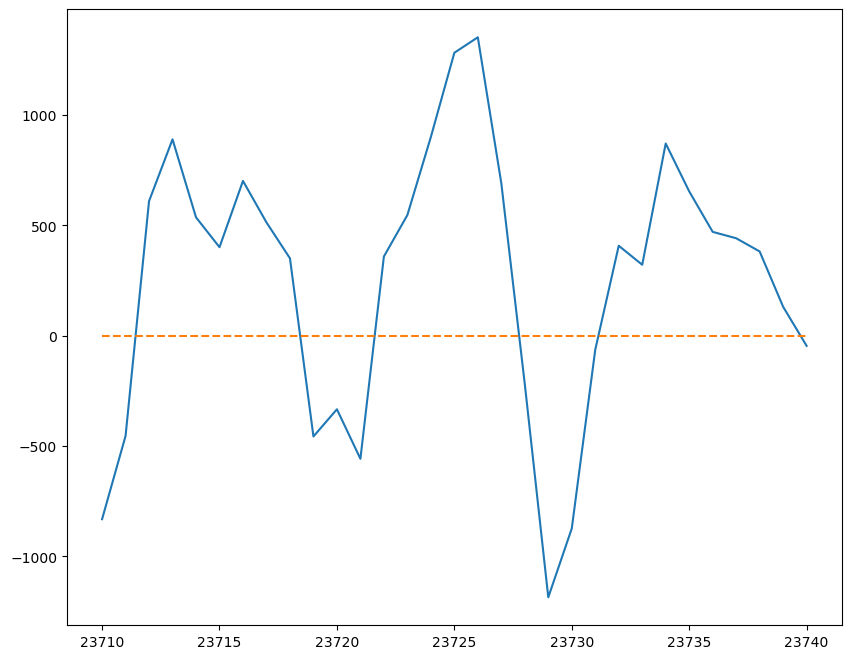

In [14]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(test)
ax.plot(test*0,linestyle='--')

In [15]:
np.array(test)

array([ -831.61929706,  -454.22399656,   610.55130394,   890.57160444,
         537.02690494,   401.56220544,   702.07250594,   513.98280644,
         351.16910694,  -456.53659256,  -333.25629206,  -557.78599156,
         359.36430894,   547.31860944,   901.33490994,  1283.13921044,
        1353.35551094,   691.46081144,  -219.47388806, -1185.62358756,
        -873.83328706,   -63.22298656,   408.17331394,   321.96261444,
         871.71791494,   654.68821544,   471.10351594,   442.17481644,
         382.28911694,   131.48941744,   -45.78028206])

In [16]:
#some example code from sam
#import numpy as np
#test = np.concatenate([np.array([-1,1,-1,-1,1,-1,1,-1,1]),np.sin(np.linspace(0,8*np.pi,1000))])
test=np.array(test)
negative_values = 1*(test>=0) #=0 where the signal is <0 ,1 otherwise
#now we need to identify places where the array above changes from 0 to 1, which we can do by differencing
start_negative_indices = np.where((negative_values[1:]-negative_values[:-1])<0)[0] 
print(start_negative_indices)
end_negative_indices = np.where((negative_values[1:]-negative_values[:-1])>0)[0]
print(end_negative_indices)
if len(start_negative_indices)>len(end_negative_indices):
    end_negative_indices = np.concatenate([end_negative_indices,[len(test)-1]])
#remove sections of length 1
section_lengths = start_negative_indices-end_negative_indices
print(section_lengths)
start_negative_indices = start_negative_indices[section_lengths>1]
end_negative_indices = end_negative_indices[section_lengths>1]
num_negative_sections = len(start_negative_indices)
print(num_negative_sections)

[ 8 17 29]
[ 1 11 21]
[7 6 8]
3


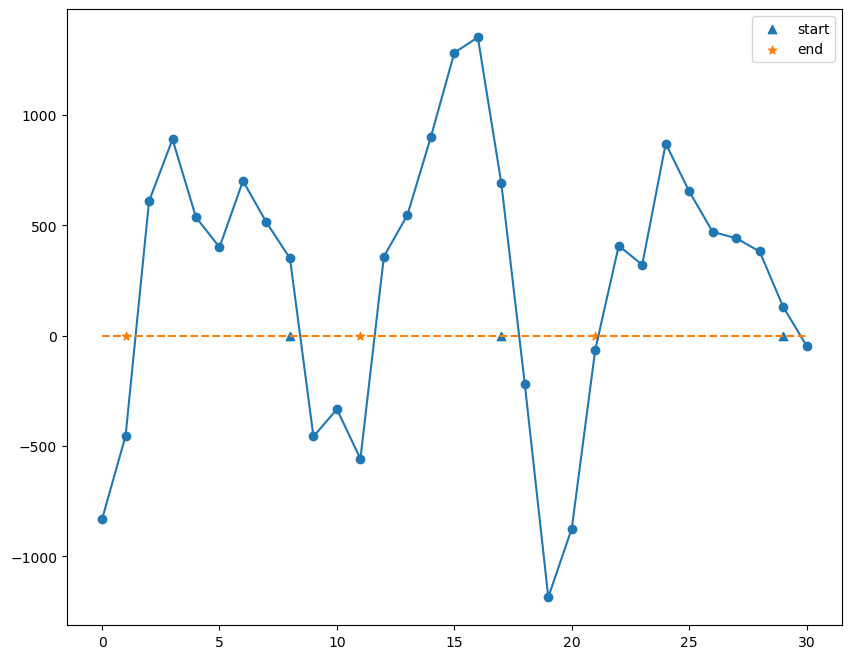

In [17]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(test,marker='o')
ax.plot(test*0,linestyle='--')
ax.scatter(x=start_negative_indices,y=start_negative_indices*0,marker='^',label='start')
ax.scatter(x=end_negative_indices,y=end_negative_indices*0,marker='*',label='end')
ax.legend()

In [18]:
def neg_anom(df,var):
    #where df is a dataframe with integer indices and var is the variable as a string you want to find the number and length of negative anomalies for
    seq=np.array(df[var]) #convert to a numpy array for this
    
    negative_values =1*(seq>=0) #=0 where the signal is <0 ,1 otherwise
    
    #now we need to identify places where the array above changes from 0 to 1, which we can do by differencing
    start_negative_indices = np.where((negative_values[1:]-negative_values[:-1])<0)[0] 
    end_negative_indices = np.where((negative_values[1:]-negative_values[:-1])>0)[0]
    if len(start_negative_indices)>len(end_negative_indices):
        end_negative_indices = np.concatenate([end_negative_indices,[len(seq)-1]])
    #remove sections of length 1
    section_lengths = end_negative_indices-start_negative_indices #+np.ones_like(start_negative_indices) 
    start_negative_indices = start_negative_indices[section_lengths>1]
    end_negative_indices = end_negative_indices[section_lengths>1]
    num_negative_sections = len(start_negative_indices)
    return (section_lengths, num_negative_sections)

In [19]:
seq=np.array(df_h_pr['psl_a']) #convert to a numpy array for this
negative_values =1*(seq>=0)
negative_values
start_negative_indices = np.where((negative_values[1:]-negative_values[:-1])<0)[0] 
end_negative_indices = np.where((negative_values[1:]-negative_values[:-1])>0)[0]
if len(start_negative_indices)>len(end_negative_indices):
    end_negative_indices = np.concatenate([end_negative_indices,[len(seq)-1]])
    #remove sections of length 1
section_lengths = end_negative_indices-start_negative_indices+np.ones_like(start_negative_indices) #adding one to make the length inclusive of the first and last points bc the end index should be inclusive
print(section_lengths)

[ -7  -3 -17 ...  -6  -5  -7]


In [20]:
(section_lengths_h, num_negative_sections_h)=neg_anom(df_h_pr,'psl_a')
print(num_negative_sections_h)

0


In [21]:
(section_lengths_p, num_negative_sections_p)=neg_anom(df_p_pr,'psl_a')
print(num_negative_sections_p)

872


Text(0, 0.5, 'Length of Negative SLP Anomaly')

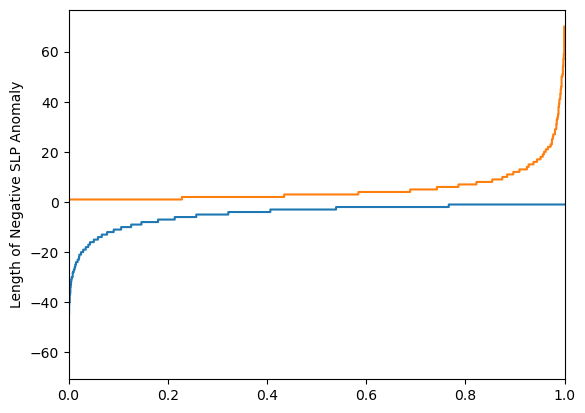

In [22]:
fig, ax= plt.subplots()
ax.ecdf(section_lengths_h,label="1950-2014",orientation='horizontal')
ax.ecdf(section_lengths_p,label="SSP 370, 2015-2044",orientation='horizontal')
ax.set_ylabel('Length of Negative SLP Anomaly')

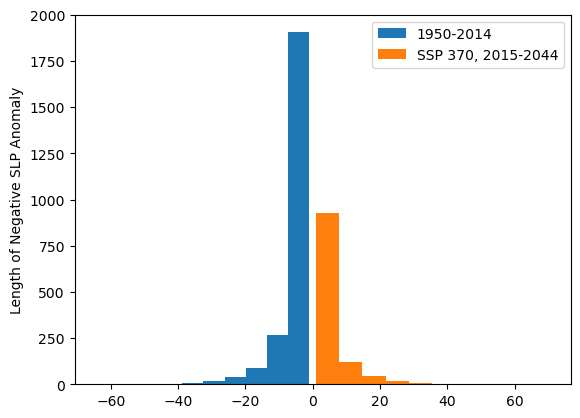

In [23]:
#histogram instead?
fig, ax= plt.subplots()
ax.hist(section_lengths_h,label="1950-2014")#,orientation='horizontal')
ax.hist(section_lengths_p,label="SSP 370, 2015-2044")#,orientation='horizontal')
ax.set_ylabel('Length of Negative SLP Anomaly')
plt.legend()

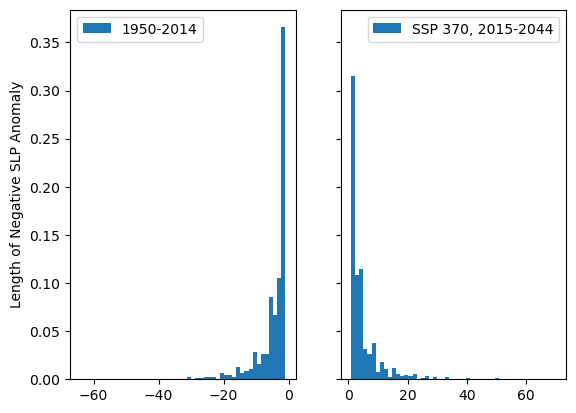

In [24]:
#histogram instead?
fig, ax= plt.subplots(1,2,sharey=True)
ax[0].hist(section_lengths_h,label="1950-2014",density=True, bins=50)#,orientation='horizontal')
ax[1].hist(section_lengths_p,label="SSP 370, 2015-2044",density=True,bins=50)#,orientation='horizontal')
ax[0].set_ylabel('Length of Negative SLP Anomaly')
ax[0].legend()
ax[1].legend()

In [25]:
#what if we also exclude the 2 day events?
section_lengths_h2=section_lengths_h[section_lengths_h>2]
section_lengths_p2=section_lengths_p[section_lengths_p>2]

/global/home/users/jennaisrael/.conda/envs/geoplot/lib/python3.11/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


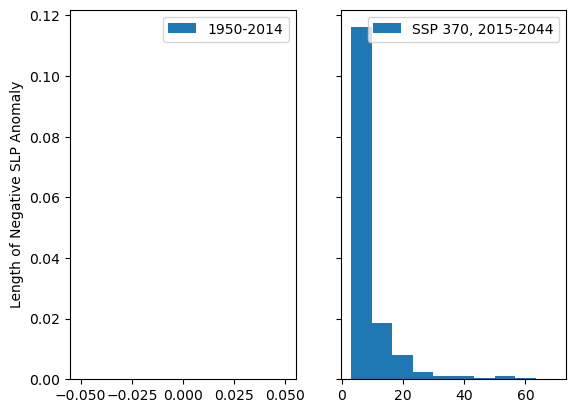

In [26]:
#histogram instead?
fig, ax= plt.subplots(1,2,sharey=True)
ax[0].hist(section_lengths_h2,label="1950-2014",density=True)#,orientation='horizontal')
ax[1].hist(section_lengths_p2,label="SSP 370, 2015-2044",density=True)#,orientation='horizontal')
ax[0].set_ylabel('Length of Negative SLP Anomaly')
ax[0].legend()
ax[1].legend()

In [27]:
#What is going on at the tails why are there events with >20 days?
print(len(section_lengths_h[section_lengths_h>20]))
print(len(section_lengths_p[section_lengths_p>20]))

0
43


In [28]:
section_lengths_h20=section_lengths_h[section_lengths_h<20]
section_lengths_p20=section_lengths_p[section_lengths_p<20]

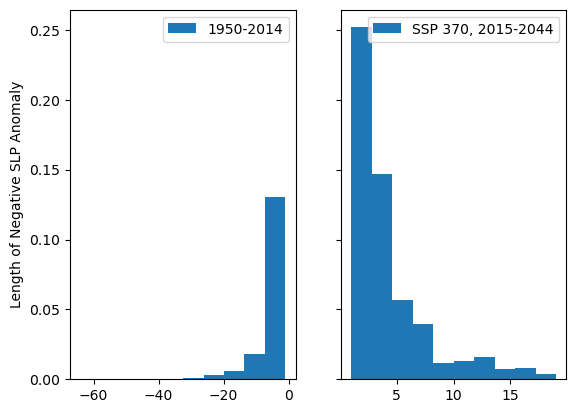

In [29]:
#histogram instead?
fig, ax= plt.subplots(1,2,sharey=True)
ax[0].hist(section_lengths_h20,label="1950-2014",density=True)#,orientation='horizontal')
ax[1].hist(section_lengths_p20,label="SSP 370, 2015-2044",density=True)#,orientation='horizontal')
ax[0].set_ylabel('Length of Negative SLP Anomaly')
ax[0].legend()
ax[1].legend()

#maybe these long negative anomalies correspond to years where things are generally below average, or maybe its just very small and negative, try putting in a threshold corresponding to some percentile (rather than must be less than 0, must me less than some other number)

Text(0, 0.5, 'Detrended windspeed anomaly [m/s]')

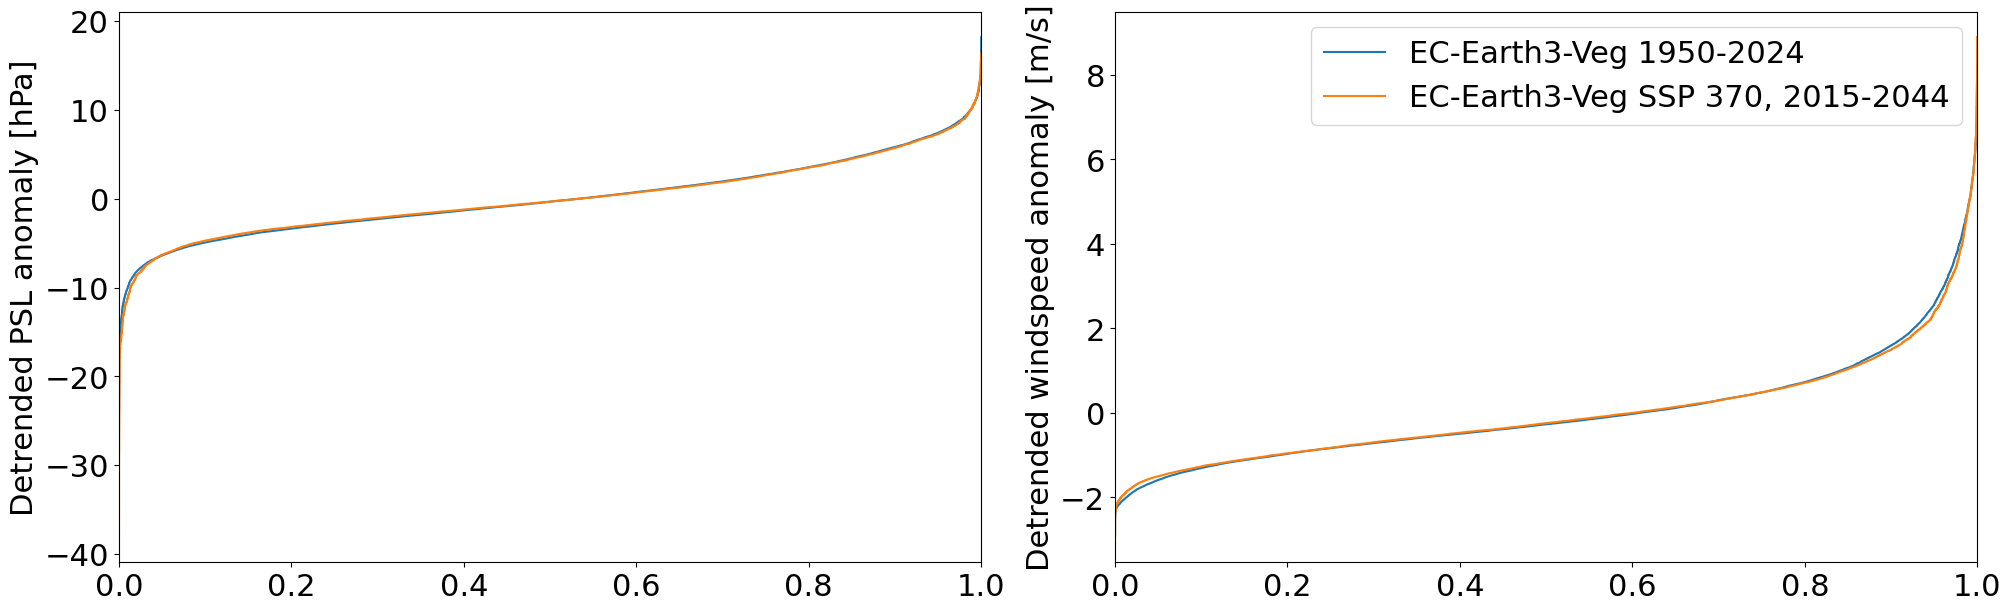

In [33]:
#make ecdf for all the anomalies
mpl.rcParams.update({'font.size': 22})
fig, ax= plt.subplots(1,2,layout="constrained",figsize=(20,6))
ax[0].ecdf(df_h_pr.psl_a*0.01,label="EC-Earth3-Veg 1950-2014",orientation='horizontal')
ax[0].ecdf(df_p_pr.psl_a*0.01,label="EC-Earth3-Veg SSP 370, 2015-2044",orientation='horizontal')
ax[1].ecdf(df_h_pr.windspeed_d,label="EC-Earth3-Veg 1950-2024",orientation='horizontal')
ax[1].ecdf(df_p_pr.windspeed_d,label="EC-Earth3-Veg SSP 370, 2015-2044",orientation='horizontal')
ax[0].set_ylabel('Detrended PSL anomaly [hPa]')
ax[1].legend()
ax[1].set_ylabel('Detrended windspeed anomaly [m/s]')

(0.99, 1.0)

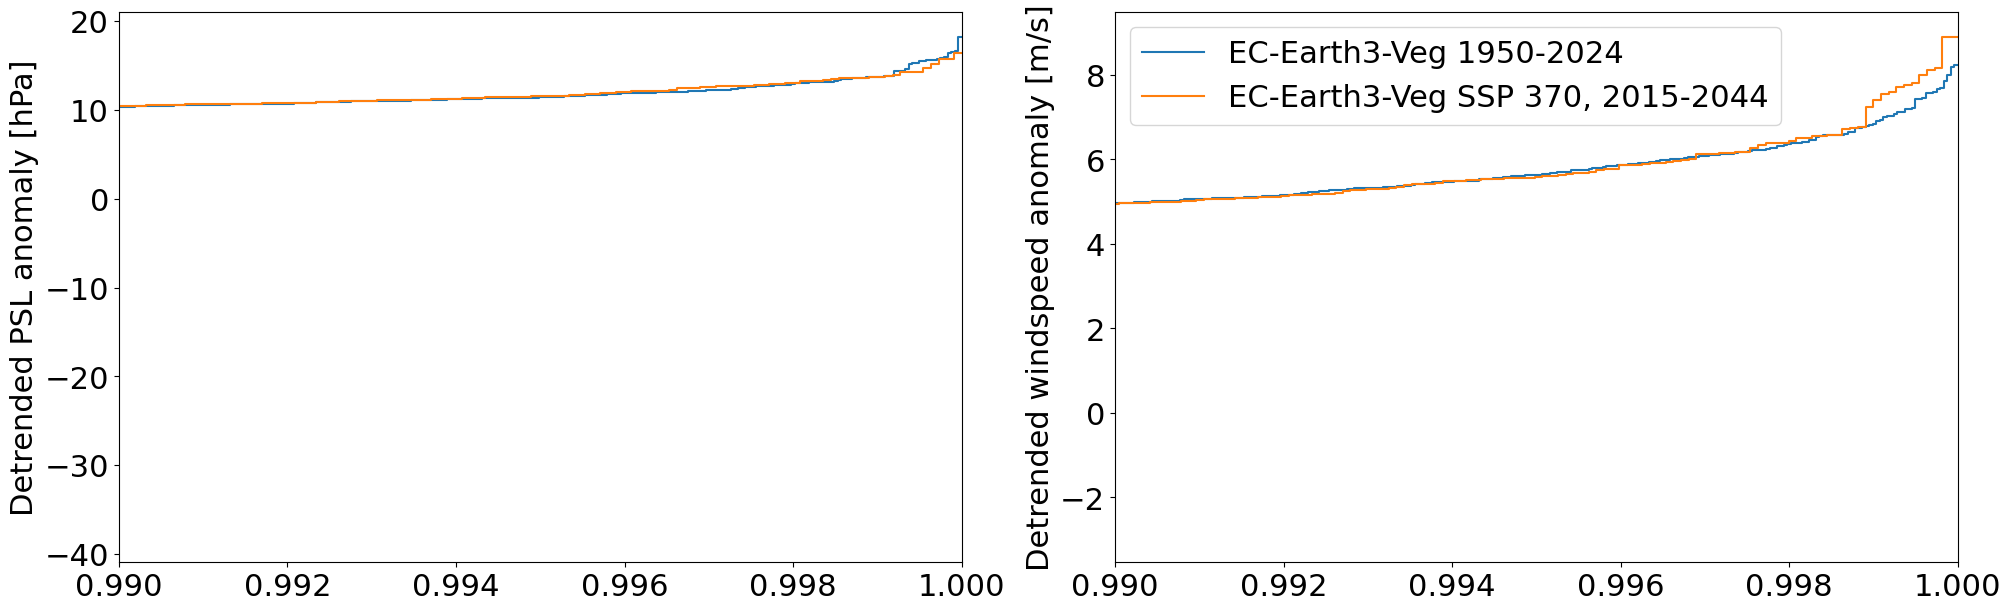

In [36]:
#make ecdf for all the anomalies
mpl.rcParams.update({'font.size': 22})
fig, ax= plt.subplots(1,2,layout="constrained",figsize=(20,6), sharex=True)
ax[0].ecdf(df_h_pr.psl_a*0.01,label="EC-Earth3-Veg 1950-2014",orientation='horizontal')
ax[0].ecdf(df_p_pr.psl_a*0.01,label="EC-Earth3-Veg SSP 370, 2015-2044",orientation='horizontal')
ax[1].ecdf(df_h_pr.windspeed_d,label="EC-Earth3-Veg 1950-2024",orientation='horizontal')
ax[1].ecdf(df_p_pr.windspeed_d,label="EC-Earth3-Veg SSP 370, 2015-2044",orientation='horizontal')
ax[0].set_ylabel('Detrended PSL anomaly [hPa]')
ax[1].legend()
ax[1].set_ylabel('Detrended windspeed anomaly [m/s]')
ax[0].set_xlim([0.99,1.0])

(-900.0, 900.0)

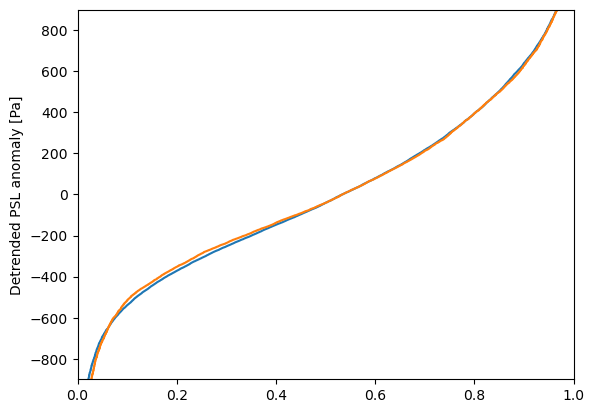

In [27]:
#zoom when the anomaly is close to 0
fig, ax= plt.subplots()
ax.ecdf(df_h_pr.psl_a,label="1950-2014",orientation='horizontal')
ax.ecdf(df_p_pr.psl_a,label="SSP 370, 2015-2044",orientation='horizontal')
ax.set_ylabel('Detrended PSL anomaly [Pa]')
ax.set_ylim([-900,900])


In [28]:
#what is going on with the long storm events?
#what are the indices of the storms longer than 5 days?
np.where(section_lengths_h>5)

(array([   8,   11,   22,   23,   24,   25,   30,   35,   48,   52,   53,
          54,   56,   57,   58,   60,   63,   74,   82,   93,   94,   96,
          97,   98,  100,  105,  111,  114,  116,  126,  127,  130,  131,
         133,  140,  143,  144,  148,  152,  155,  159,  160,  161,  162,
         163,  166,  181,  187,  189,  190,  192,  193,  196,  197,  198,
         199,  200,  203,  211,  219,  220,  222,  223,  224,  226,  228,
         230,  231,  232,  239,  243,  246,  263,  265,  266,  267,  269,
         270,  272,  276,  286,  292,  295,  297,  300,  301,  303,  304,
         305,  306,  307,  323,  328,  329,  330,  332,  333,  335,  339,
         358,  359,  362,  364,  366,  367,  368,  370,  371,  380,  385,
         390,  392,  394,  395,  398,  399,  401,  405,  408,  415,  421,
         425,  431,  433,  434,  436,  437,  438,  440,  443,  451,  455,
         456,  458,  462,  463,  465,  466,  467,  468,  469,  483,  491,
         493,  494,  495,  496,  503, 

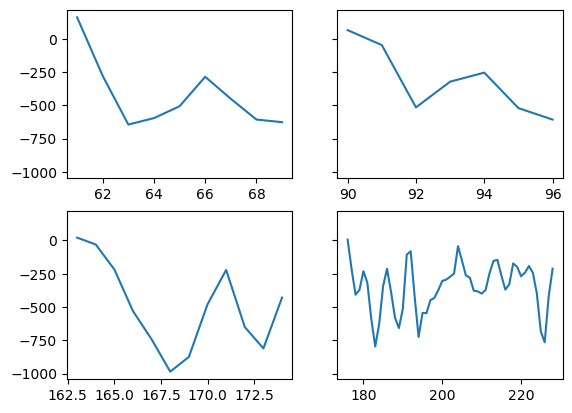

In [30]:
#first 4 are 8,9,10,11, look at the start and end indices for that period
fig, ax =plt.subplots(2,2, sharey=True)
ax[0,0].plot(df_h_pr['psl_a'][start_negative_indices[8]:end_negative_indices[8]])
ax[0,1].plot(df_h_pr['psl_a'][start_negative_indices[11]:end_negative_indices[11]])
ax[1,0].plot(df_h_pr['psl_a'][start_negative_indices[22]:end_negative_indices[22]])
ax[1,1].plot(df_h_pr['psl_a'][start_negative_indices[23]:end_negative_indices[23]])


/tmp/ipykernel_3681816/1203181676.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),rotation=90)


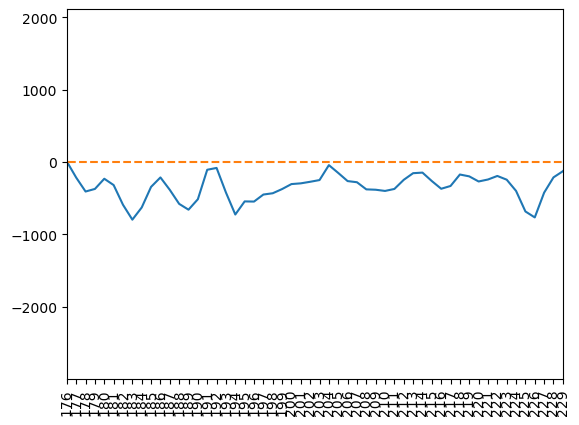

In [41]:
fig, ax =plt.subplots()
ax.plot(df_h_pr.time,df_h_pr['psl_a'])
ax.plot(df_h_pr['psl_a']*0,linestyle='--')
ax.set_xlim([df_h_pr.time[start_negative_indices[23]],df_h_pr.time[end_negative_indices[23]]])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
ax.set_xticklabels(ax.get_xticks(),rotation=90)
plt.show()

In [43]:
#which days 
print(df_h_pr.time[176],df_h_pr.time[229])

1950-06-26 12:00:00 1950-08-18 12:00:00


In [40]:
ax.set_xticklabels(ax.get_xticks(),rotation=90)
plt.show()

/tmp/ipykernel_3681816/1442116062.py:1: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticks(),rotation=90)
